# Fachprojekt Machine Learning
Authors: Anastasiia Korzhylova, Ivan Shishkin, Ramneek Agnihotri, Rodi Mehi

**Due date:** Wednesday, 12. June 2024

## Import necessary components

In [42]:
# Import the necessary libraries
import time
import torch, torch.nn.functional as F
from torch.utils.data import DataLoader
from torch.optim.lr_scheduler import StepLR, ExponentialLR, CosineAnnealingLR

# Import the VAE model and functions
import networks
from datasets import create_datasets
from evaluation import evaluate
from sampling import sample

## Set hyperparameters, loss function and optimizing tools

In [43]:
# Hyperparameters
batch_size = 64 # Number of images per update of the network
num_epochs = 50 # One epoch means seeing every image of the training datasetSS
latent_dim = 128  # Size of the latent space
input_channels = 3  # CIFAR-10 images have 3 color channels
learning_rate = 0.0001 # Determines how drastically the parameters of the network change

# Select the device that will be used for training: GPU, if available, otherwise CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')
print('=========================================')

# Put the neural network on the selected device
model = networks.VAE(input_channels, latent_dim)
model.to(device)

# Loss function
def loss_function(recon_x, x, mu, logvar):
    MSE = F.mse_loss(recon_x, x, reduction='sum')
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return MSE + KLD

# Optimizer selection
optimizer_option = 'adamw'

optimizer = None
if optimizer_option == "adam":
  optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
elif optimizer_option == "adamw":
  optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)
elif optimizer_option == "rmsprop":
  optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)
else:
  optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Learning rate scheduler parameters
lr_schedule_option = 'cosine'

scheduler = None
if lr_schedule_option == 'step':
  scheduler = StepLR(optimizer, step_size=30, gamma=0.5)
elif lr_schedule_option == 'exponential':
  scheduler = ExponentialLR(optimizer, gamma=0.9)
elif lr_schedule_option == 'cosine':
  scheduler = CosineAnnealingLR(optimizer, T_max=50, eta_min=0.0001)

# Scaler for AMP
scaler = torch.cuda.amp.GradScaler()

Using device: cuda


## Choose a dataset for training

Files already downloaded and verified
Files already downloaded and verified


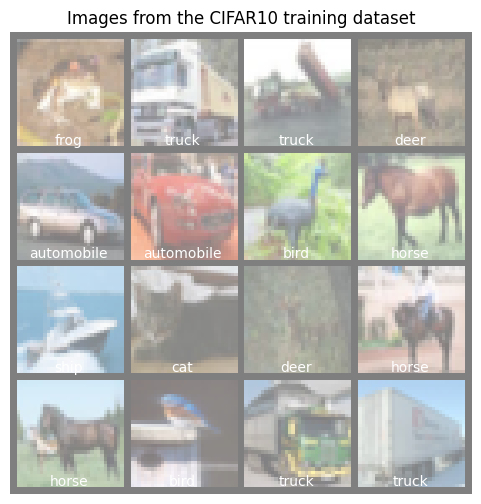

In [44]:
# Create and visualize the datasets for MNIST / CIFAR10
dataset_name = 'CIFAR10'
train_loader, test_loader = create_datasets(dataset_name, batch_size)

## Training loop

Epoch 1, Mean Test Loss: 7791.5698086683915, Learning Rate: 0.000100, Time: 13.27s


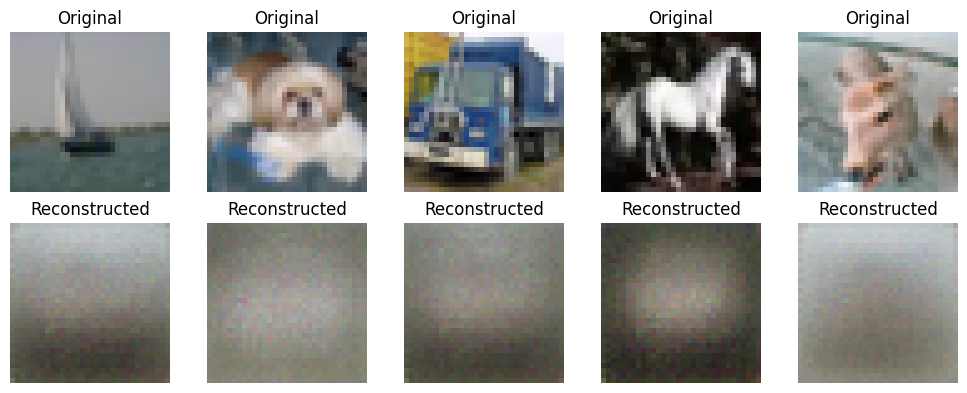

---------------------------------------------------------------------------------------------------
Epoch 2, Mean Test Loss: 6970.571976388336, Learning Rate: 0.000100, Time: 10.89s


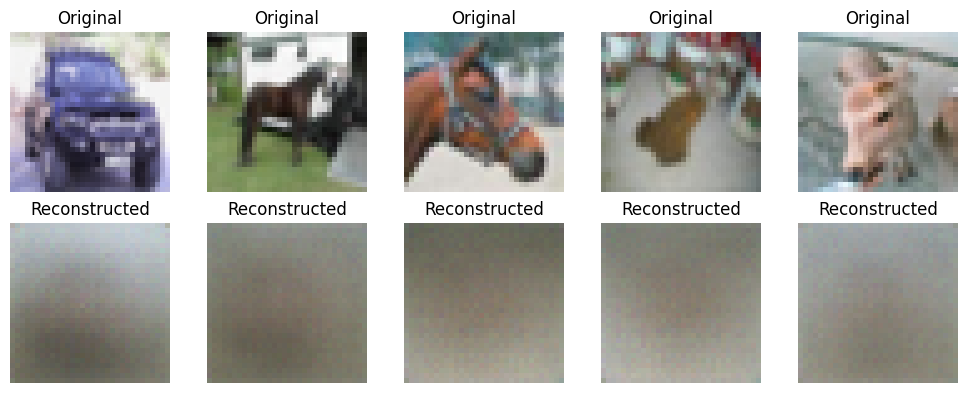

---------------------------------------------------------------------------------------------------
Epoch 3, Mean Test Loss: 6577.3665452702035, Learning Rate: 0.000100, Time: 10.65s


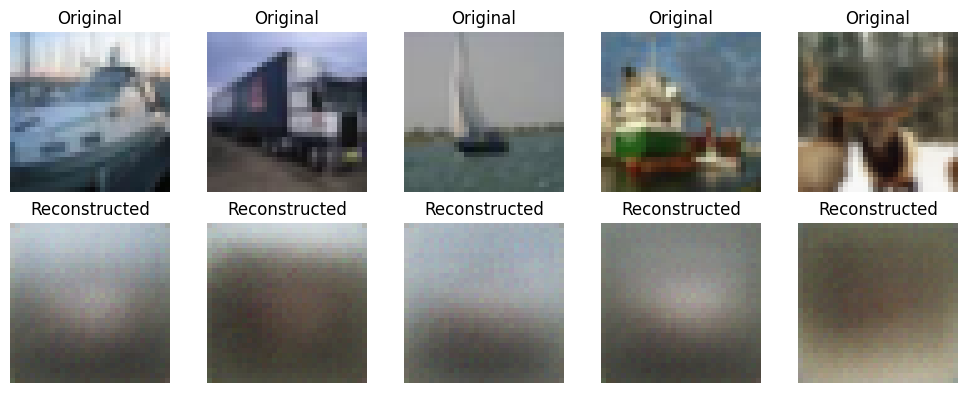

---------------------------------------------------------------------------------------------------
Epoch 4, Mean Test Loss: 6366.903870795183, Learning Rate: 0.000100, Time: 10.51s


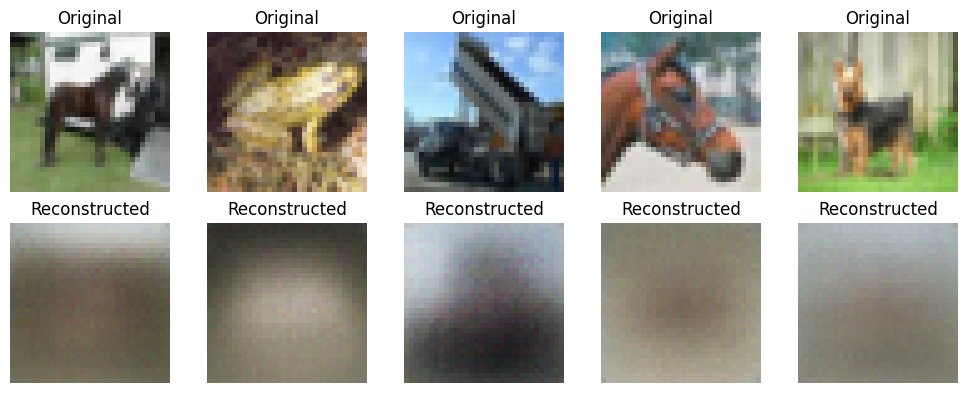

---------------------------------------------------------------------------------------------------
Epoch 5, Mean Test Loss: 6132.505582578623, Learning Rate: 0.000100, Time: 10.94s


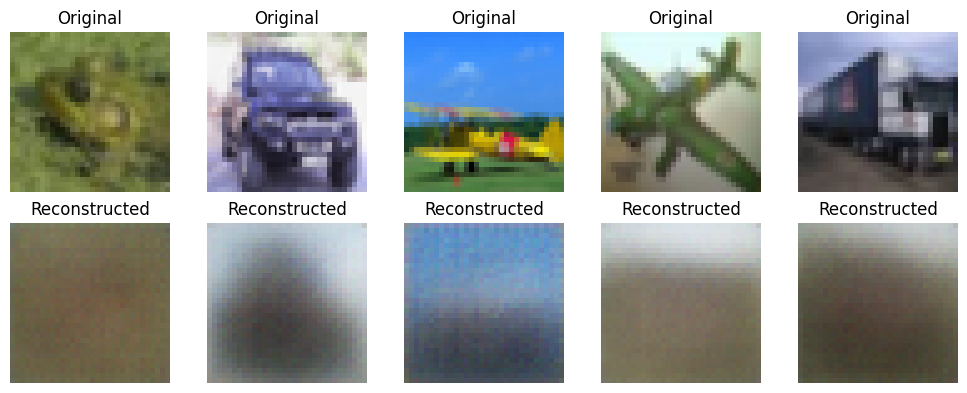

---------------------------------------------------------------------------------------------------
Epoch 6, Mean Test Loss: 5955.5024997200935, Learning Rate: 0.000100, Time: 10.73s


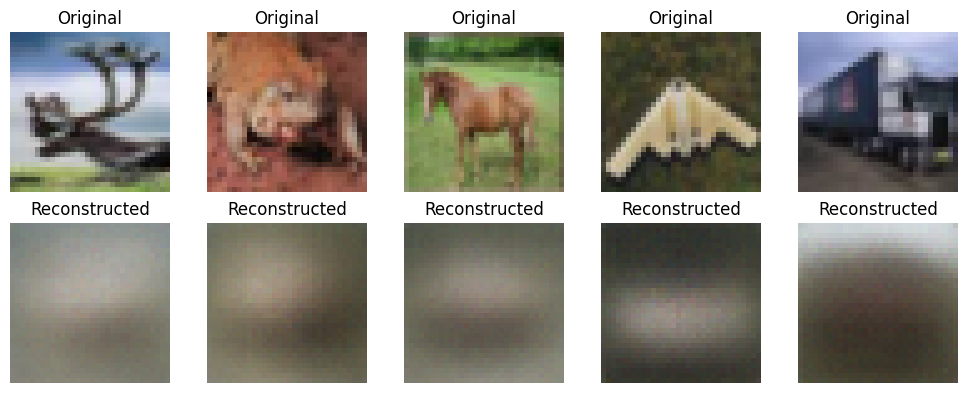

---------------------------------------------------------------------------------------------------
Epoch 7, Mean Test Loss: 5894.955418677846, Learning Rate: 0.000100, Time: 10.70s


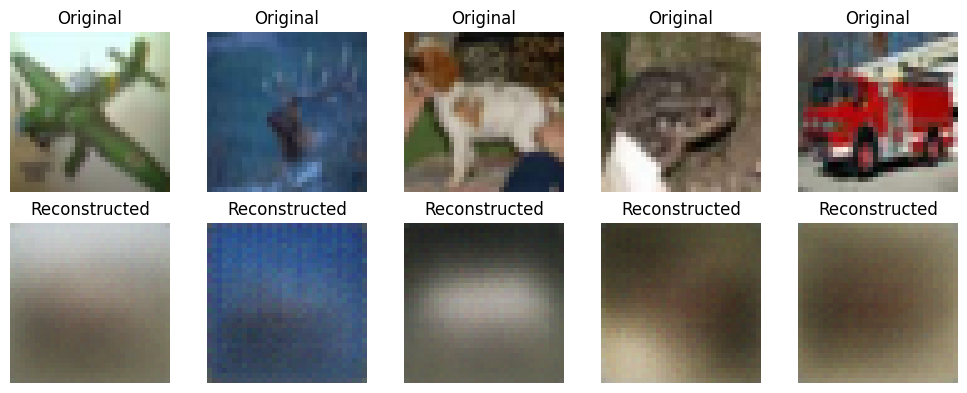

---------------------------------------------------------------------------------------------------
Epoch 8, Mean Test Loss: 5828.737964022691, Learning Rate: 0.000100, Time: 10.09s


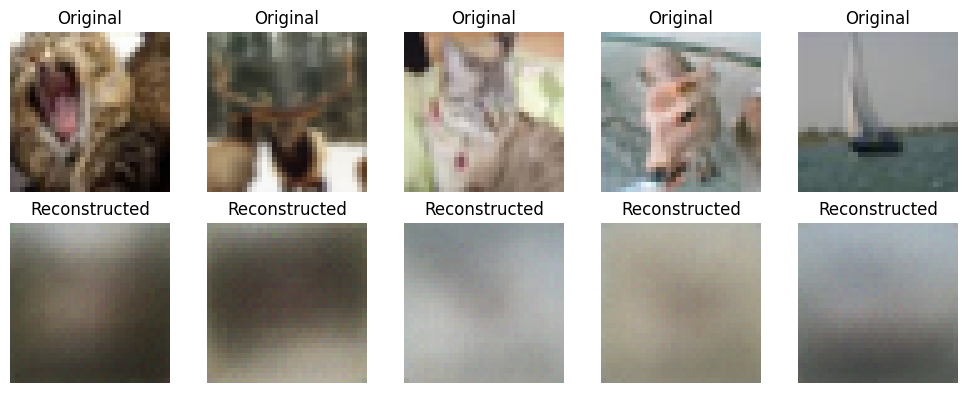

---------------------------------------------------------------------------------------------------
Epoch 9, Mean Test Loss: 5838.502299897989, Learning Rate: 0.000100, Time: 9.88s


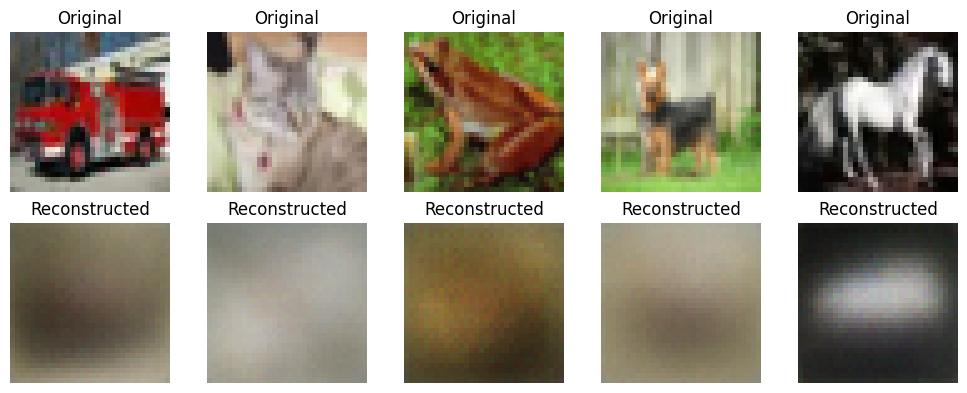

---------------------------------------------------------------------------------------------------
Epoch 10, Mean Test Loss: 5741.4429395153265, Learning Rate: 0.000100, Time: 9.89s


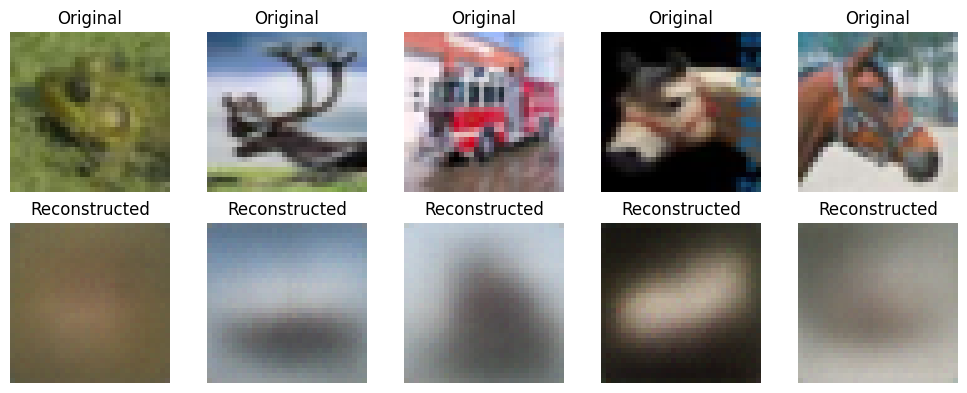

---------------------------------------------------------------------------------------------------
Epoch 11, Mean Test Loss: 5631.622816729698, Learning Rate: 0.000100, Time: 9.77s


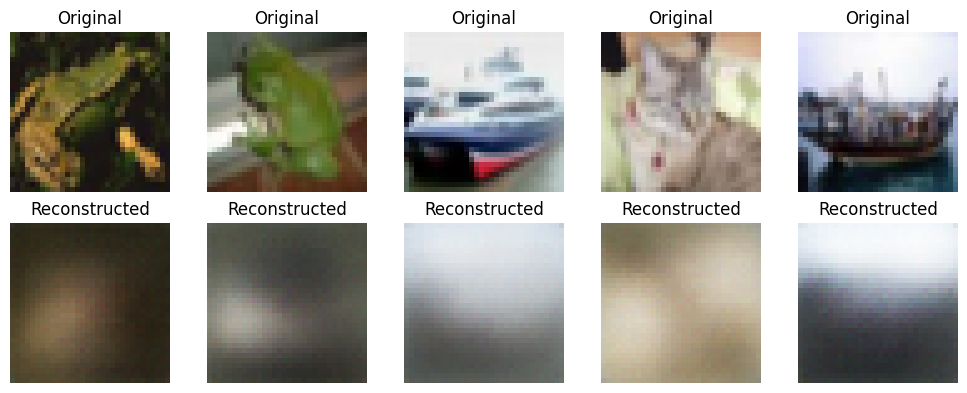

---------------------------------------------------------------------------------------------------
Epoch 12, Mean Test Loss: 5612.869544934315, Learning Rate: 0.000100, Time: 10.08s


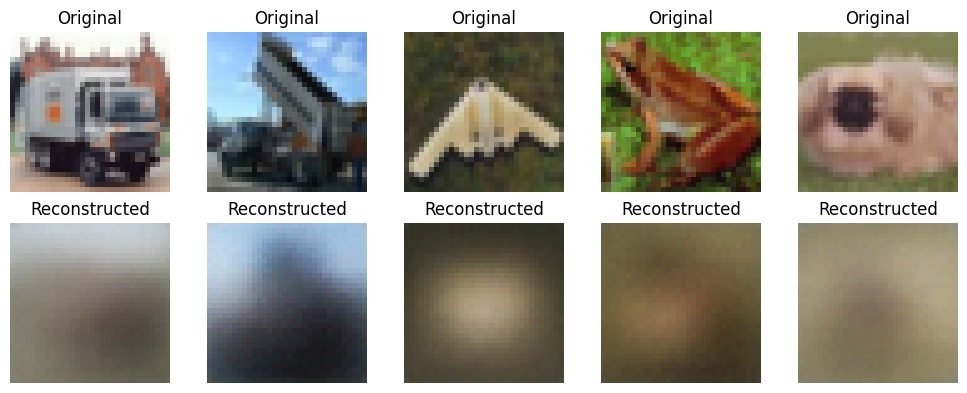

---------------------------------------------------------------------------------------------------
Epoch 13, Mean Test Loss: 5574.9600931155455, Learning Rate: 0.000100, Time: 9.77s


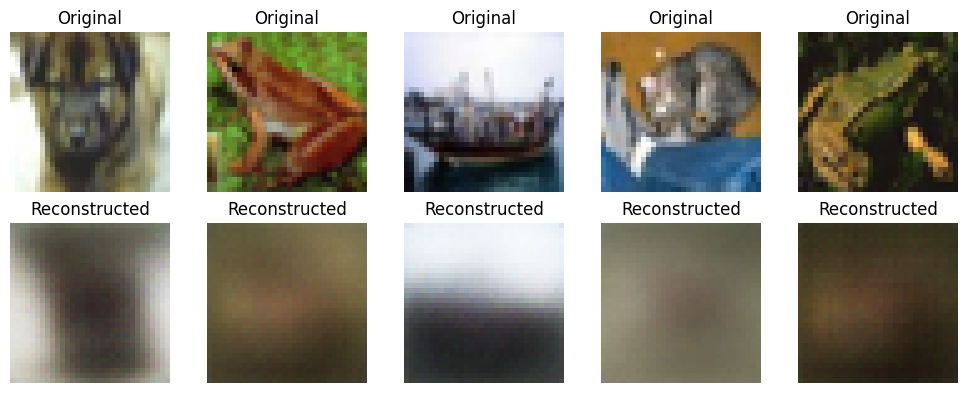

---------------------------------------------------------------------------------------------------
Epoch 14, Mean Test Loss: 5564.95200304165, Learning Rate: 0.000100, Time: 9.89s


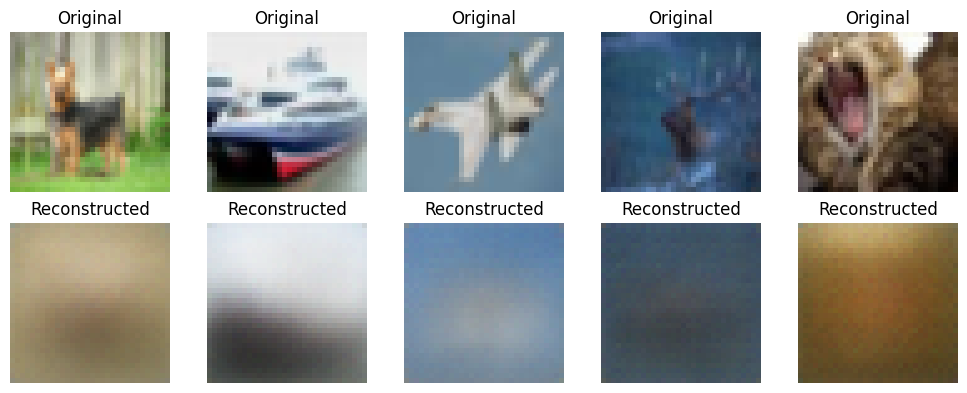

---------------------------------------------------------------------------------------------------
Epoch 15, Mean Test Loss: 5586.274124048318, Learning Rate: 0.000100, Time: 10.24s


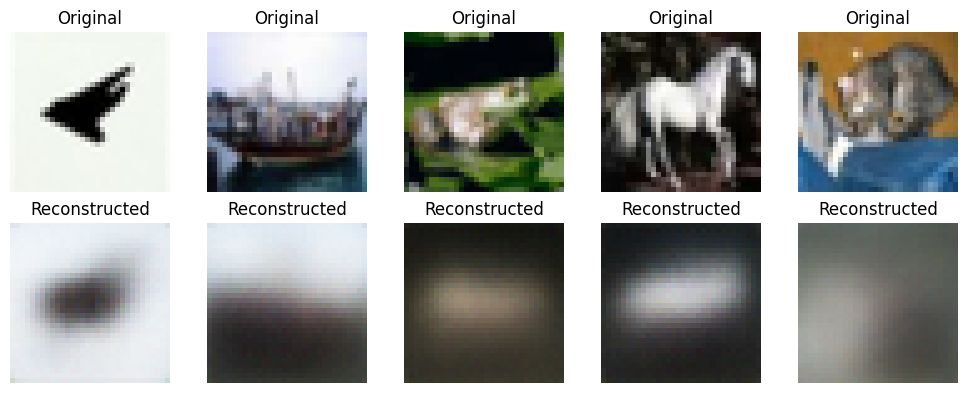

---------------------------------------------------------------------------------------------------
Epoch 16, Mean Test Loss: 5492.891398630324, Learning Rate: 0.000100, Time: 10.23s


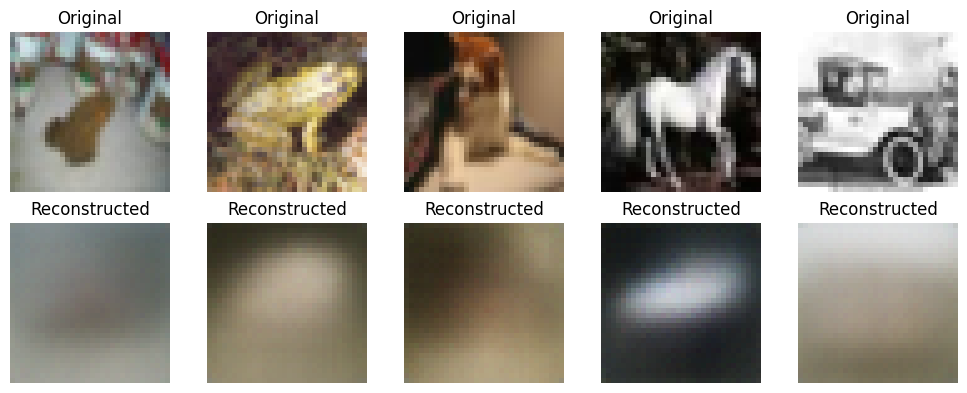

---------------------------------------------------------------------------------------------------
Epoch 17, Mean Test Loss: 5509.260209587729, Learning Rate: 0.000100, Time: 10.48s


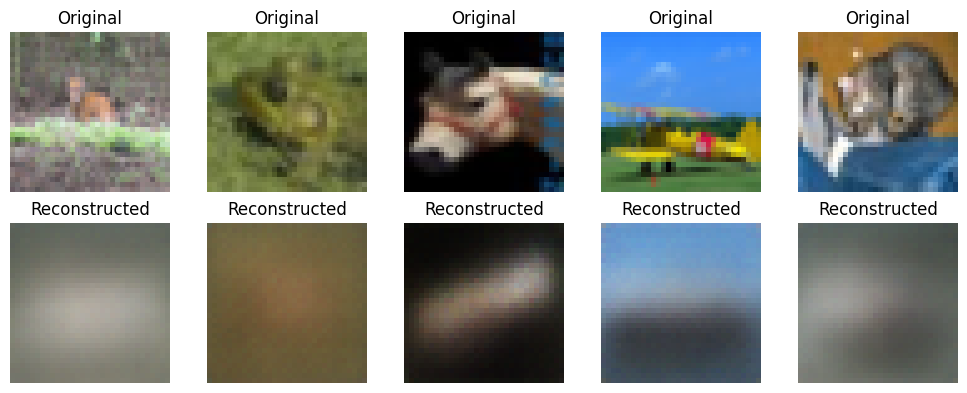

---------------------------------------------------------------------------------------------------
Epoch 18, Mean Test Loss: 5421.5237508397195, Learning Rate: 0.000100, Time: 9.95s


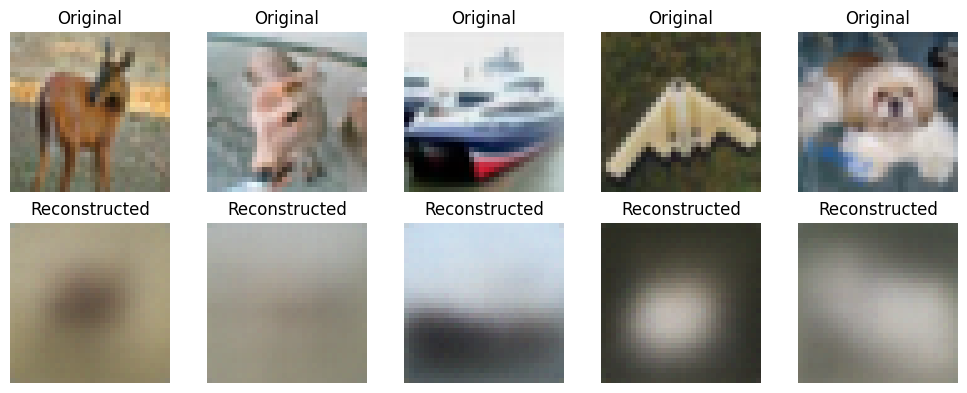

---------------------------------------------------------------------------------------------------
Epoch 19, Mean Test Loss: 5398.62130989998, Learning Rate: 0.000100, Time: 10.26s


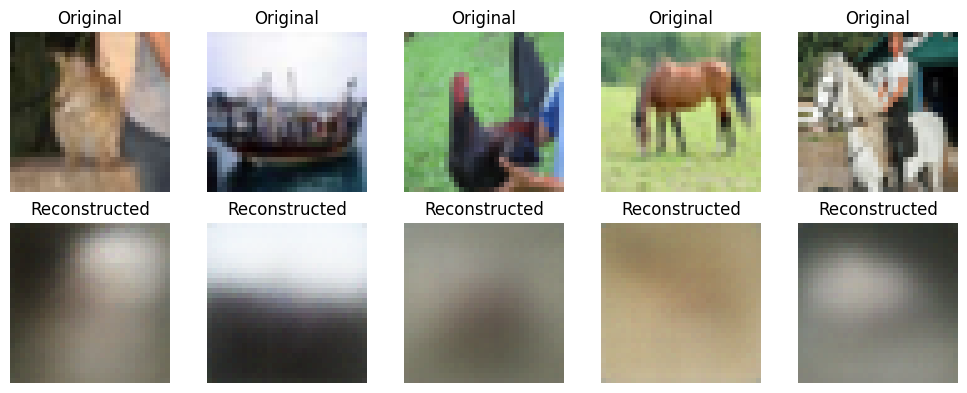

---------------------------------------------------------------------------------------------------
Epoch 20, Mean Test Loss: 5429.641554911425, Learning Rate: 0.000100, Time: 10.46s


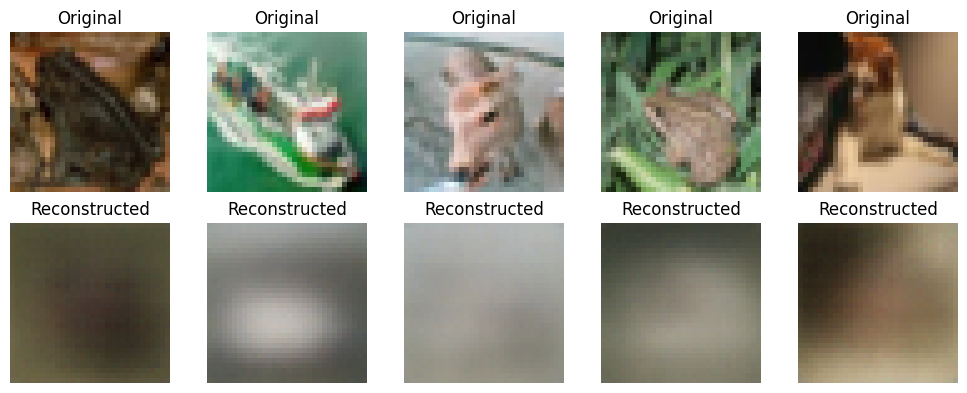

---------------------------------------------------------------------------------------------------
Epoch 21, Mean Test Loss: 5386.248651783937, Learning Rate: 0.000100, Time: 10.12s


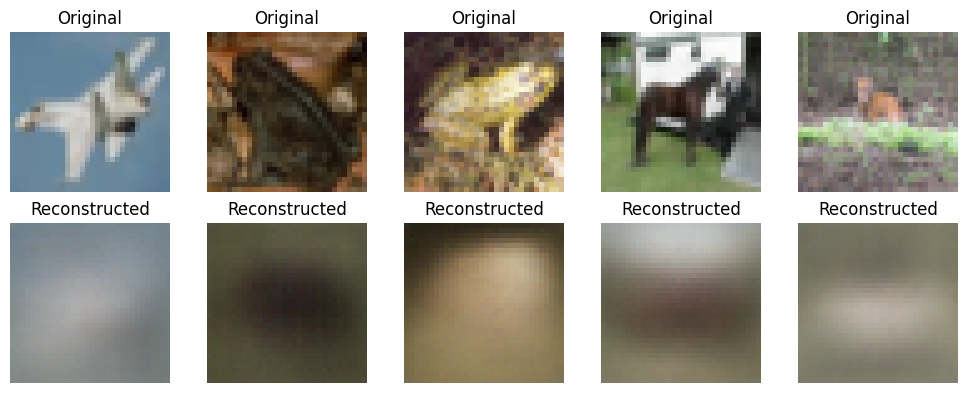

---------------------------------------------------------------------------------------------------
Epoch 22, Mean Test Loss: 5374.173624415306, Learning Rate: 0.000100, Time: 10.14s


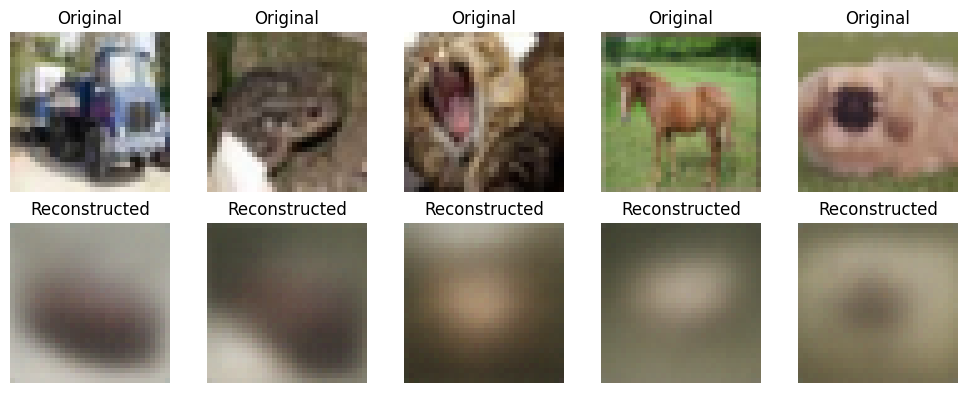

---------------------------------------------------------------------------------------------------
Epoch 23, Mean Test Loss: 5375.845549953971, Learning Rate: 0.000100, Time: 10.02s


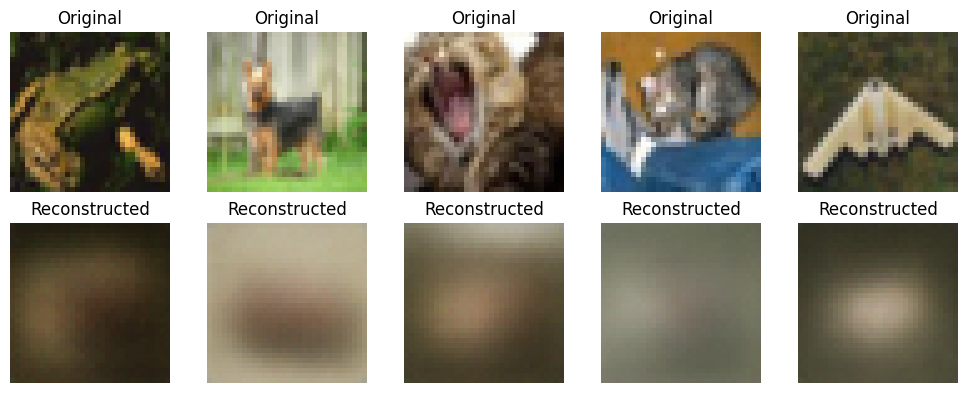

---------------------------------------------------------------------------------------------------
Epoch 24, Mean Test Loss: 5360.602314359823, Learning Rate: 0.000100, Time: 9.98s


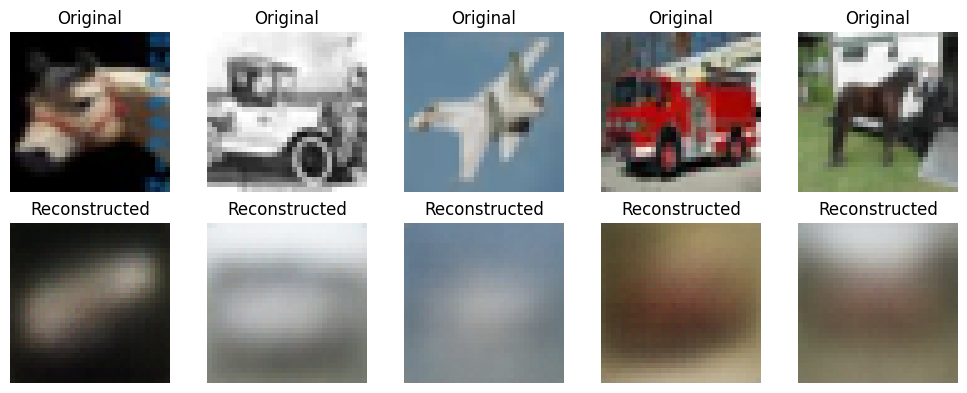

---------------------------------------------------------------------------------------------------
Epoch 25, Mean Test Loss: 5372.57640668541, Learning Rate: 0.000100, Time: 9.91s


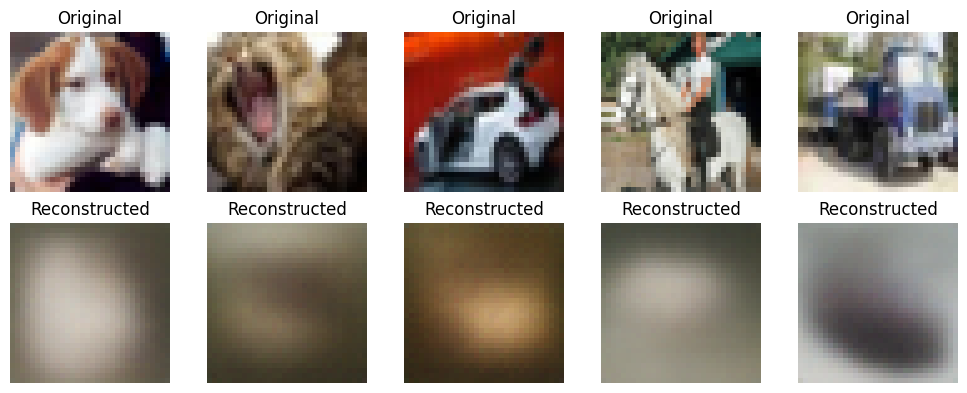

---------------------------------------------------------------------------------------------------
Epoch 26, Mean Test Loss: 5340.851672907544, Learning Rate: 0.000100, Time: 9.98s


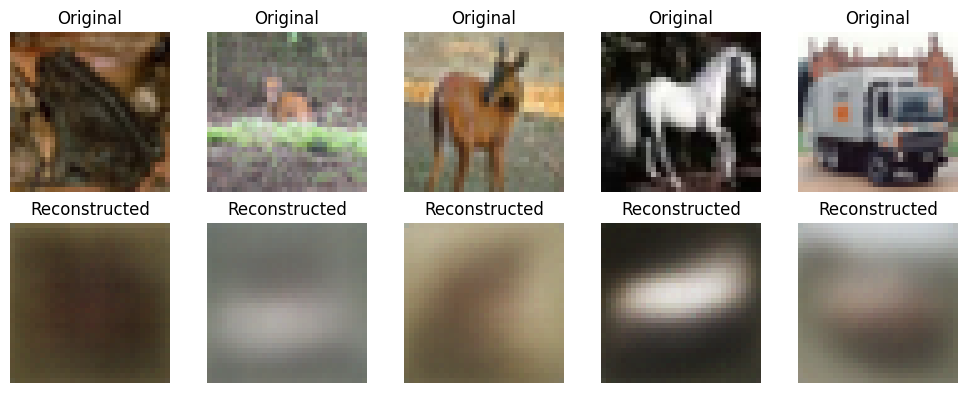

---------------------------------------------------------------------------------------------------
Epoch 27, Mean Test Loss: 5372.413124035877, Learning Rate: 0.000100, Time: 9.84s


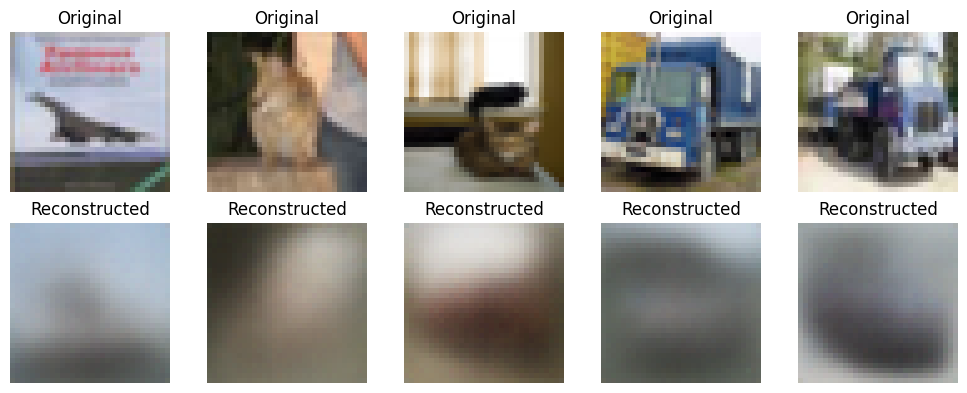

---------------------------------------------------------------------------------------------------
Epoch 28, Mean Test Loss: 5337.8004686877985, Learning Rate: 0.000100, Time: 9.79s


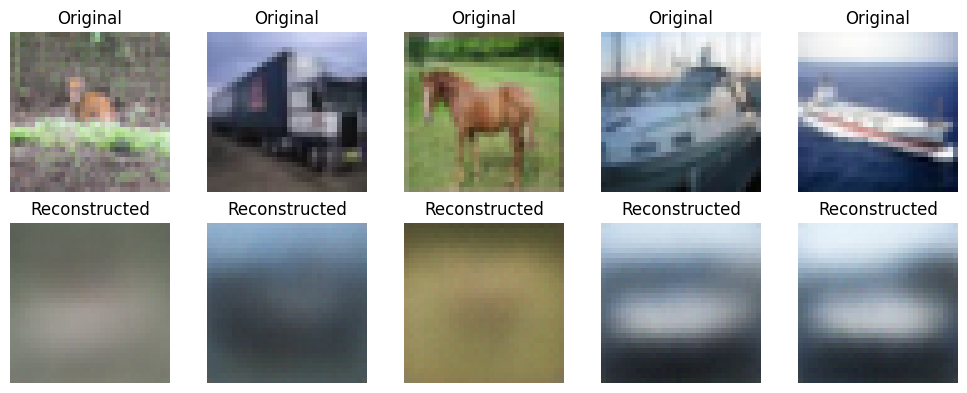

---------------------------------------------------------------------------------------------------
Epoch 29, Mean Test Loss: 5372.908485364002, Learning Rate: 0.000100, Time: 10.04s


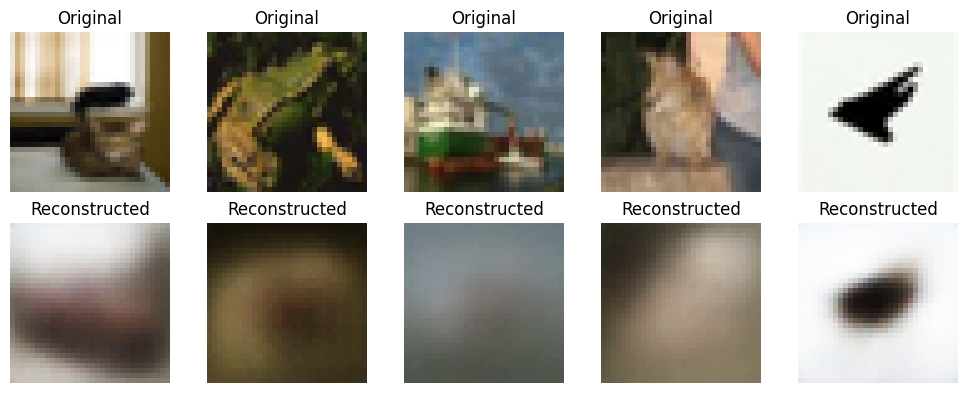

---------------------------------------------------------------------------------------------------
Epoch 30, Mean Test Loss: 5294.192093575836, Learning Rate: 0.000100, Time: 10.13s


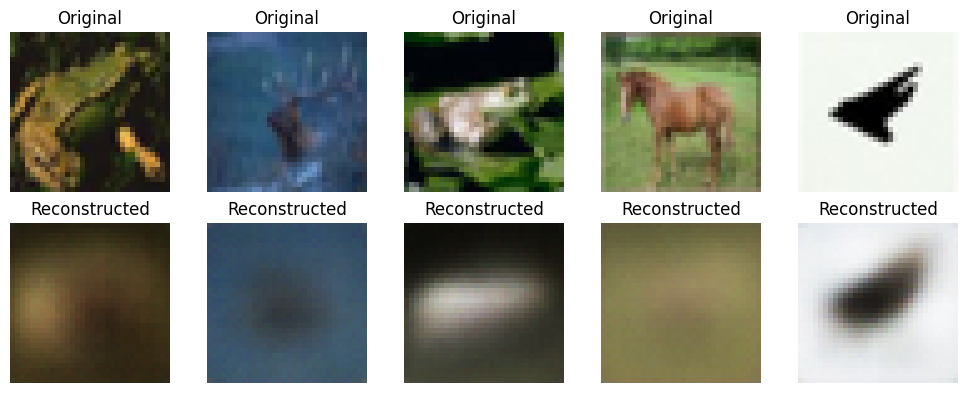

---------------------------------------------------------------------------------------------------
Epoch 31, Mean Test Loss: 5289.763458835091, Learning Rate: 0.000100, Time: 10.18s


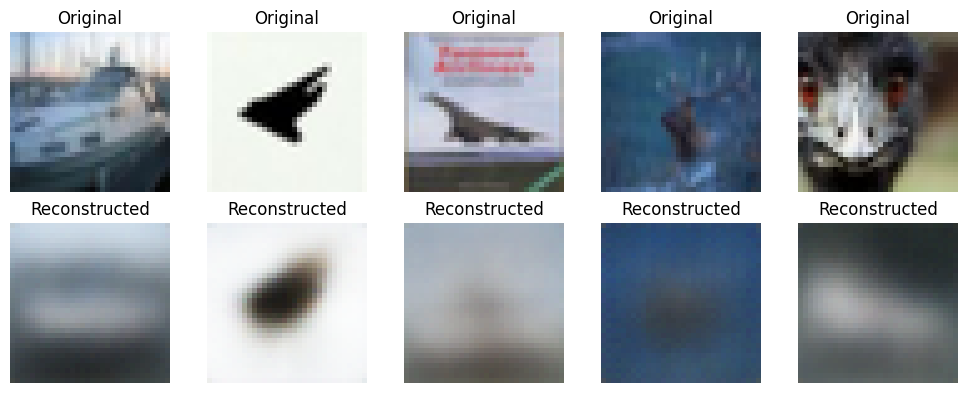

---------------------------------------------------------------------------------------------------
Epoch 32, Mean Test Loss: 5273.12915972084, Learning Rate: 0.000100, Time: 10.02s


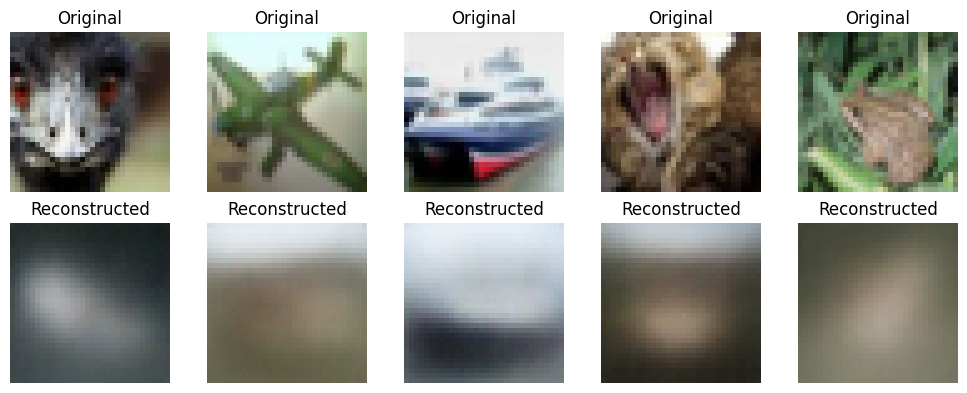

---------------------------------------------------------------------------------------------------
Epoch 33, Mean Test Loss: 5288.996316897641, Learning Rate: 0.000100, Time: 10.29s


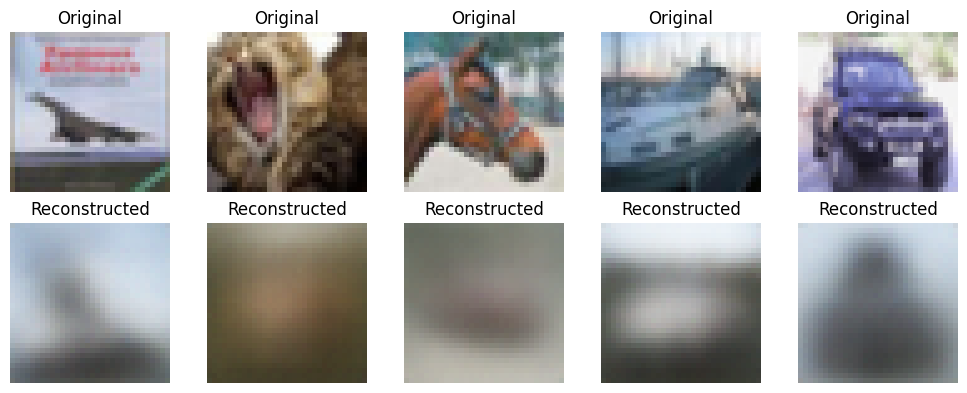

---------------------------------------------------------------------------------------------------
Epoch 34, Mean Test Loss: 5256.984623028215, Learning Rate: 0.000100, Time: 9.85s


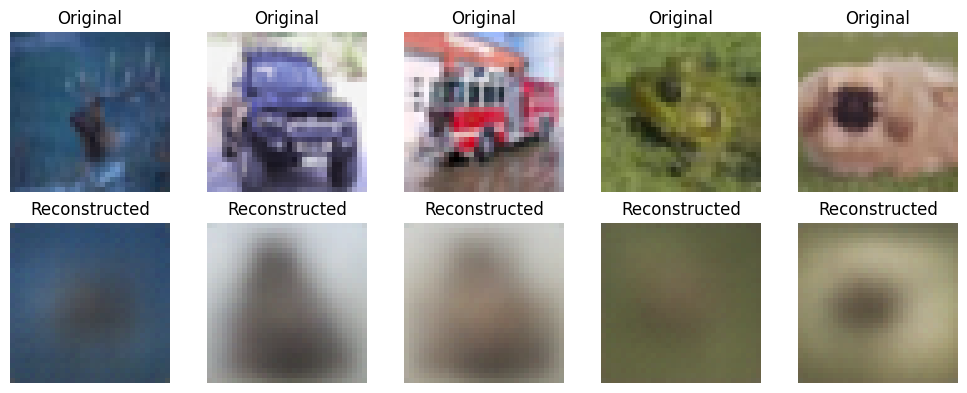

---------------------------------------------------------------------------------------------------
Epoch 35, Mean Test Loss: 5281.750229367784, Learning Rate: 0.000100, Time: 10.05s


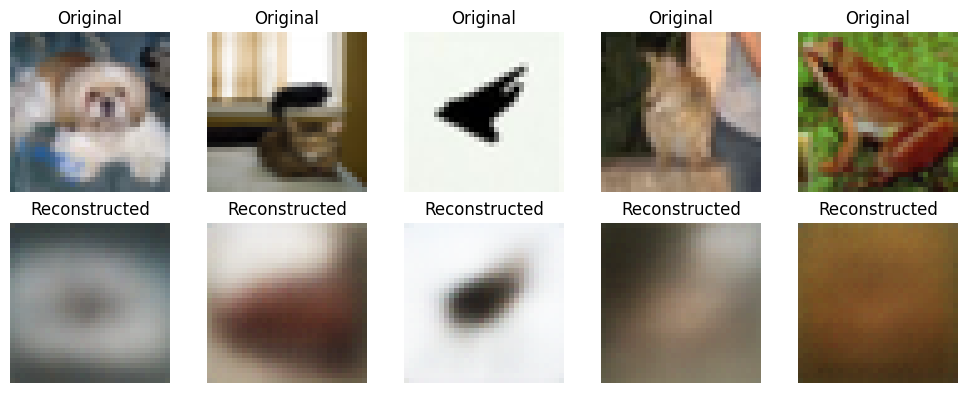

---------------------------------------------------------------------------------------------------
Epoch 36, Mean Test Loss: 5279.081242069317, Learning Rate: 0.000100, Time: 9.83s


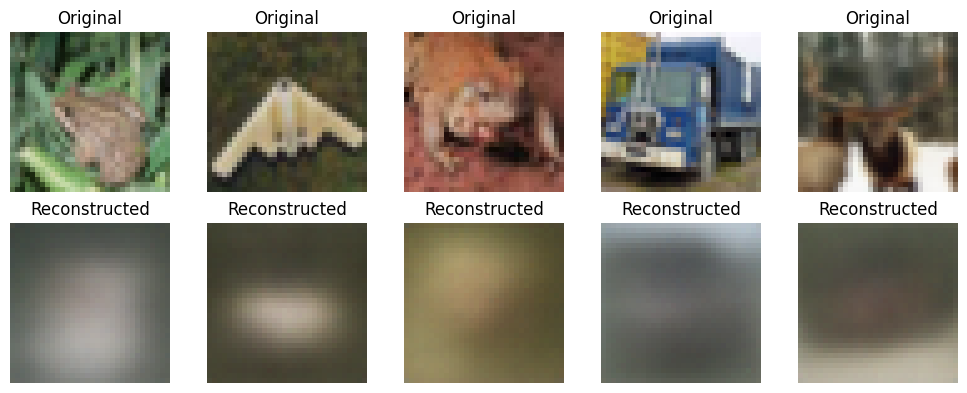

---------------------------------------------------------------------------------------------------
Epoch 37, Mean Test Loss: 5275.434477010351, Learning Rate: 0.000100, Time: 10.39s


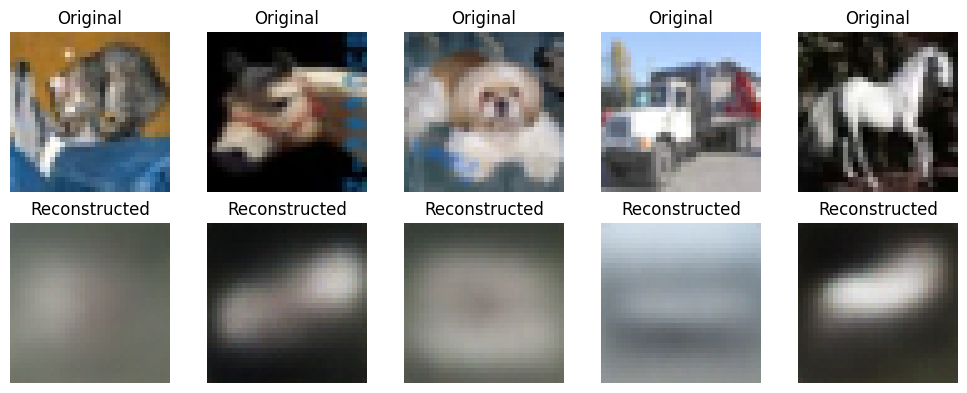

---------------------------------------------------------------------------------------------------
Epoch 38, Mean Test Loss: 5260.453125777518, Learning Rate: 0.000100, Time: 10.35s


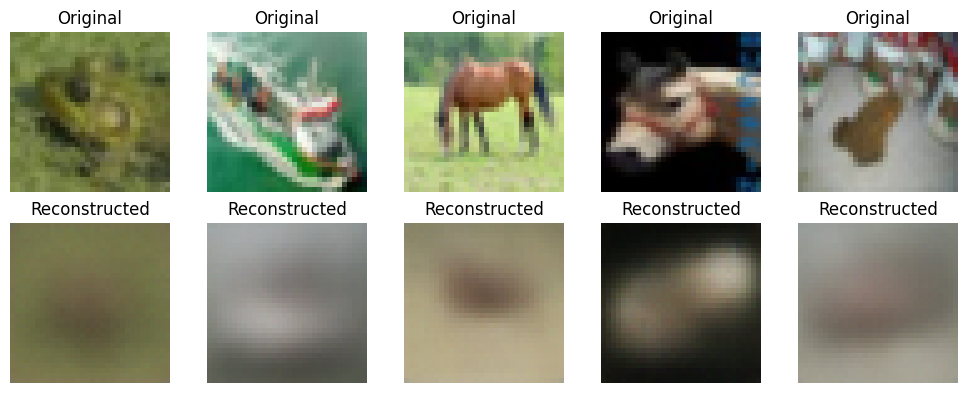

---------------------------------------------------------------------------------------------------
Epoch 39, Mean Test Loss: 5248.326085570511, Learning Rate: 0.000100, Time: 9.99s


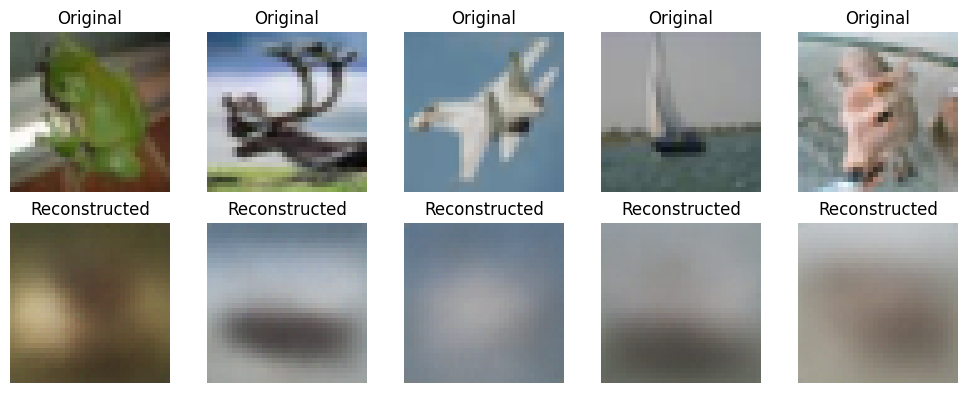

---------------------------------------------------------------------------------------------------
Epoch 40, Mean Test Loss: 5245.441158999303, Learning Rate: 0.000100, Time: 9.80s


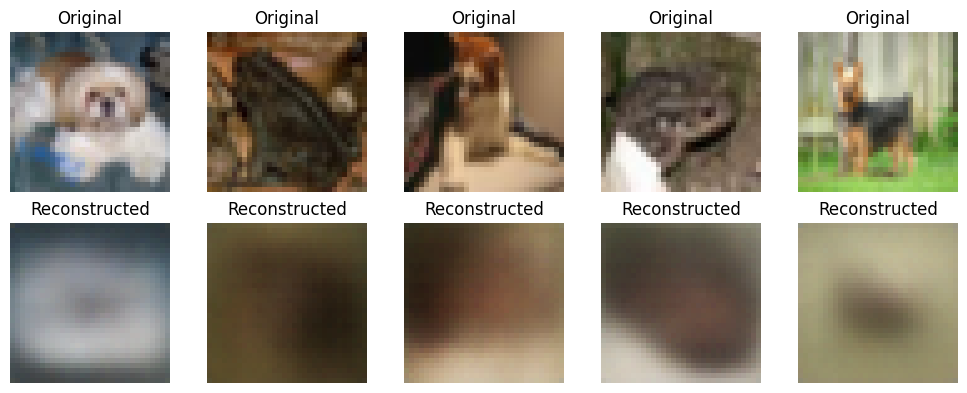

---------------------------------------------------------------------------------------------------
Epoch 41, Mean Test Loss: 5301.849376119626, Learning Rate: 0.000100, Time: 10.19s


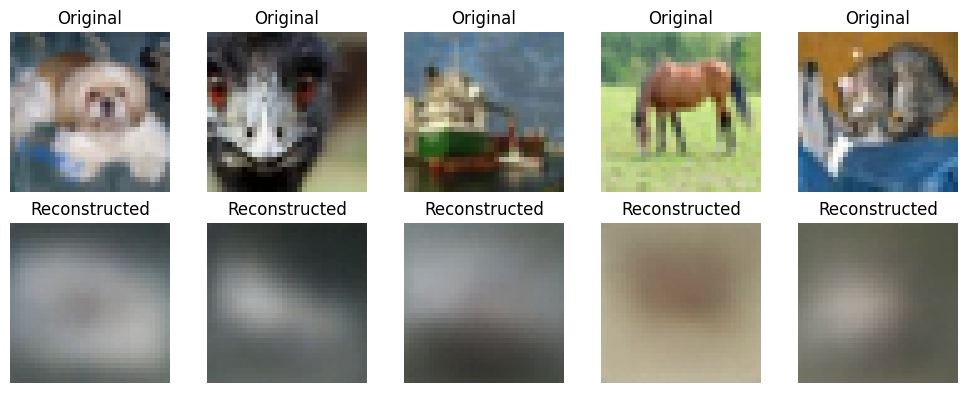

---------------------------------------------------------------------------------------------------
Epoch 42, Mean Test Loss: 5246.746860382663, Learning Rate: 0.000100, Time: 10.07s


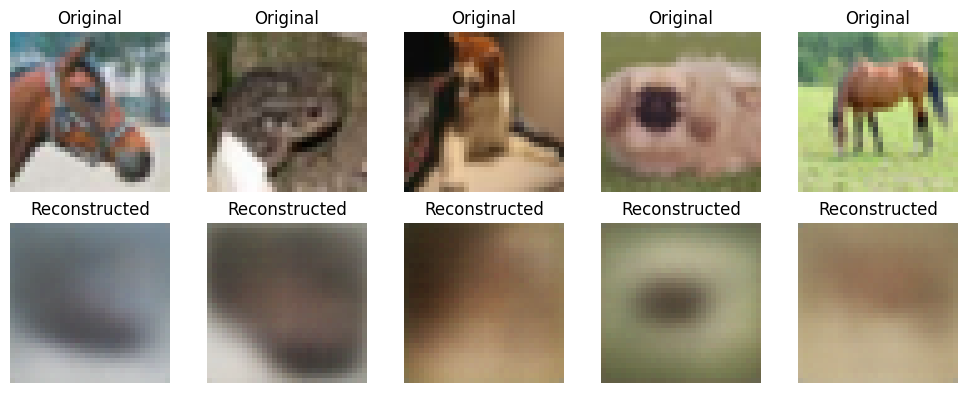

---------------------------------------------------------------------------------------------------
Epoch 43, Mean Test Loss: 5244.990022112609, Learning Rate: 0.000100, Time: 10.40s


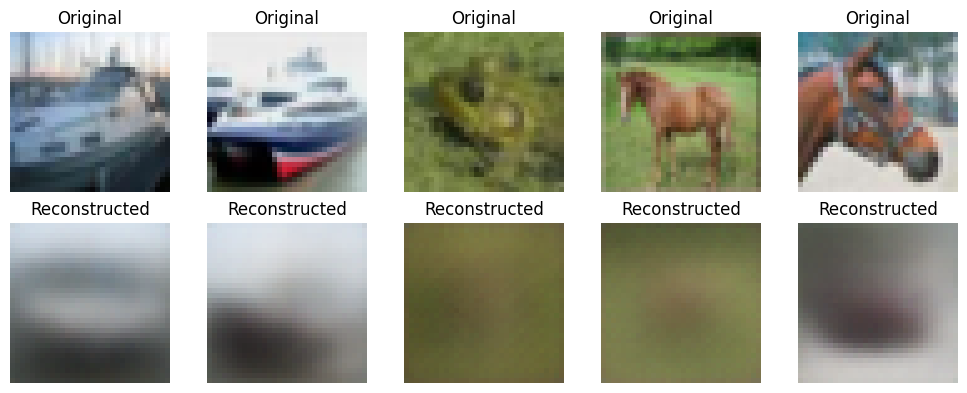

---------------------------------------------------------------------------------------------------
Epoch 44, Mean Test Loss: 5236.383544144357, Learning Rate: 0.000100, Time: 10.06s


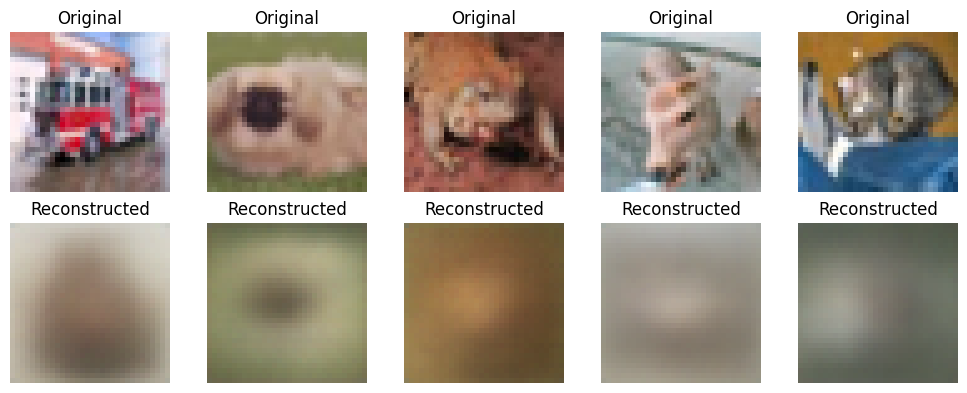

---------------------------------------------------------------------------------------------------
Epoch 45, Mean Test Loss: 5247.7048495347335, Learning Rate: 0.000100, Time: 10.55s


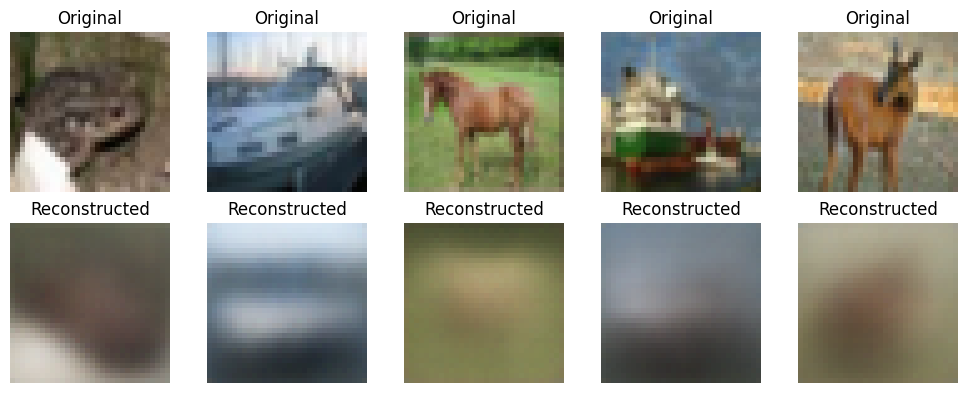

---------------------------------------------------------------------------------------------------
Epoch 46, Mean Test Loss: 5243.518291108927, Learning Rate: 0.000100, Time: 9.96s


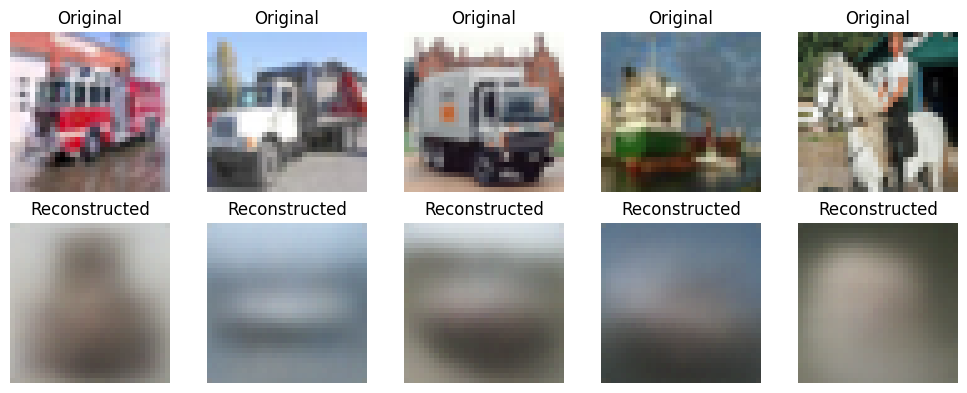

---------------------------------------------------------------------------------------------------
Epoch 47, Mean Test Loss: 5231.2864562599525, Learning Rate: 0.000100, Time: 10.15s


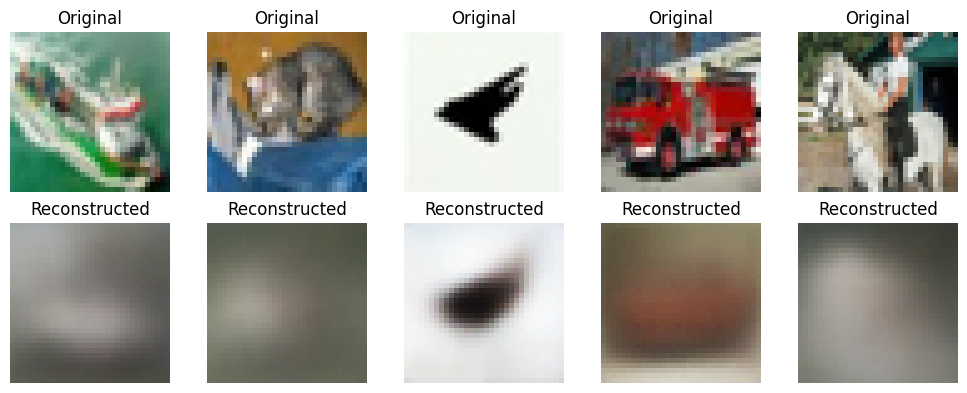

---------------------------------------------------------------------------------------------------
Epoch 48, Mean Test Loss: 5218.055817233529, Learning Rate: 0.000100, Time: 10.31s


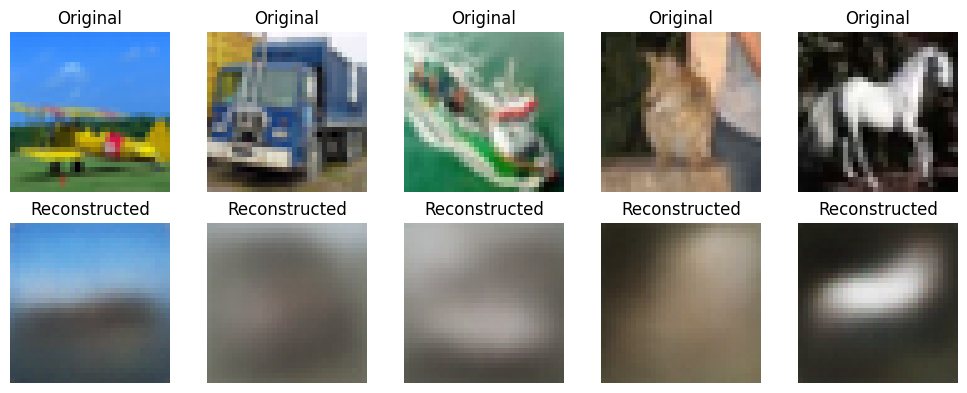

---------------------------------------------------------------------------------------------------
Epoch 49, Mean Test Loss: 5247.782858684564, Learning Rate: 0.000100, Time: 10.73s


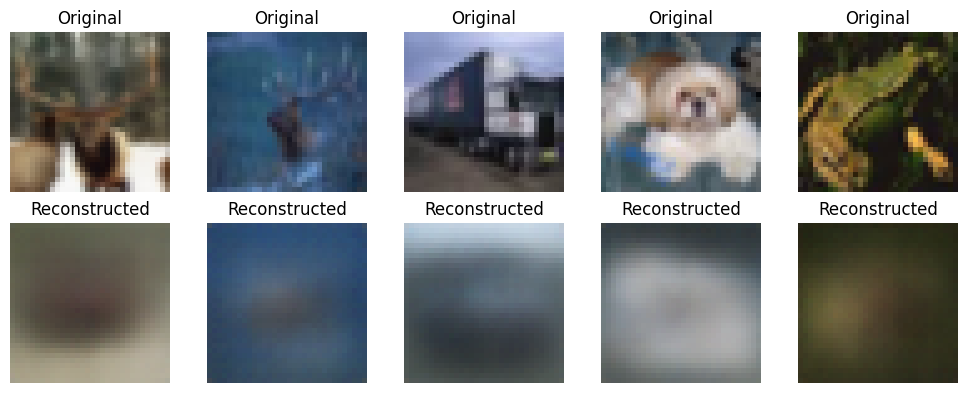

---------------------------------------------------------------------------------------------------
Epoch 50, Mean Test Loss: 5233.7941948957505, Learning Rate: 0.000100, Time: 10.72s


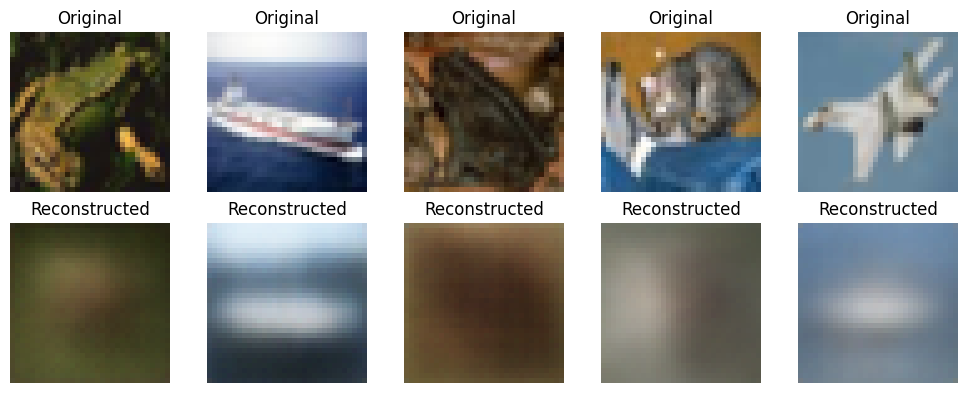

---------------------------------------------------------------------------------------------------


In [45]:
# We want to plot training and testing losses at the end of training
train_losses = []
test_losses = []
learning_rates = []

# Training loop
for epoch in range(num_epochs):
  model.train()
  epoch_start_time = time.time()

  for _, (data, _) in enumerate(train_loader):
    data = data.to(device)
    optimizer.zero_grad()

    with torch.cuda.amp.autocast():
      # Forward pass
      recon_batch, mu, logvar = model(data)

      # Compute loss
      loss = loss_function(recon_batch, data, mu, logvar)
      train_losses.append(loss)

    # Backward pass
    scaler.scale(loss).backward()

    # Optimization step
    scaler.step(optimizer)
    scaler.update()

    # Ivan: add logging here

  # Step the learning rate scheduler
  if scheduler is not None:
    lr = scheduler.get_last_lr()[0]
    scheduler.step()
  else:
    lr = learning_rate
  learning_rates.append(lr)

  # After the epoch, evaluate the accuracy on the test dataset
  mean_loss = evaluate(model, test_loader, loss_function, device)
  test_losses.append(mean_loss)

  elapsed_time = time.time() - epoch_start_time
  print(f'Epoch {epoch + 1}, Mean Test Loss: {mean_loss}, Learning Rate: {lr:.6f}, Time: {elapsed_time:.2f}s')

  # Generate and log test images after each epoch
  sample(model, test_loader, device, num_samples=5)
  print('---------------------------------------------------------------------------------------------------')

# Ivan: add plots here